In [1]:
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

C:\Users\martin.knaze\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], 
                                                     [0.229, 0.224, 0.225])
                                ])

In [3]:
data = datasets.ImageFolder(r"..\data\raw\Data from Steve\train", transform=transform)
loader = DataLoader(data, batch_size=1, shuffle=False)
class_names = data.classes

In [4]:
resnet = models.resnet.resnet18(pretrained=True)
resnet.fc = nn.Identity()

In [5]:
embeddings_df = pd.DataFrame(columns=[f'embedding_{i}' for i in range(512)])
embeddings_df['target'] = 0

In [6]:
for i, (image, y) in enumerate(loader):

    embedding = resnet(image).tolist()[0]
    embedding.append(y.item())
    embedding_dict = {k:v for k, v in zip(embeddings_df.columns, embedding)}
    embeddings_df.loc[i] = embedding_dict
    

In [7]:
embeddings_df['target'] = embeddings_df['target'].astype(str)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
X = embeddings_df.drop('target', axis=1)
y = embeddings_df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [13]:
RF = RandomForestClassifier()

fit = RF.fit(X_train, y_train)

In [14]:
fit.predict(X_test)

array(['0', '0', '0', '0', '0', '0', '0', '0'], dtype=object)

In [15]:
y_test

54    0
51    0
23    0
4     0
70    1
60    1
15    0
0     0
Name: target, dtype: object

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
XGB = GradientBoostingClassifier()

XGB_fit = XGB.fit(X_train, y_train)
XGB_fit.predict(X_test)

array(['1', '0', '0', '0', '0', '0', '0', '0'], dtype=object)

In [19]:
y_test

54    0
51    0
23    0
4     0
70    1
60    1
15    0
0     0
Name: target, dtype: object

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=10)

pca.fit(X)

PCA(n_components=10)

<BarContainer object of 10 artists>

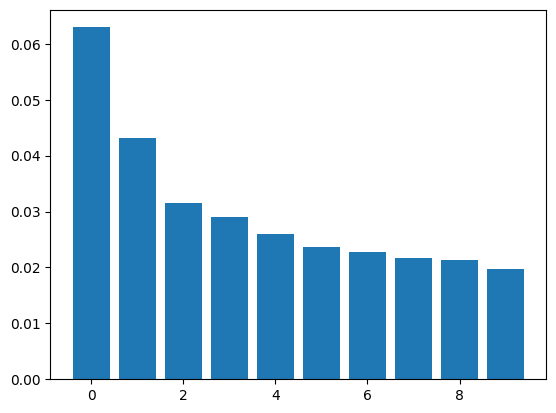

In [22]:
plt.bar(x=list(range(10)), height=pca.explained_variance_ratio_)